Dataset Source and column descriptions: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

#### Imports

In [8]:
!pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import graphviz 

import sklearn
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Data

In [10]:
df = pd.read_csv(
    "../../data/placement_data_full_class.csv",
    sep=",",
    index_col=0
)

display(df.head())
display(df.shape)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


(215, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


# EDA and Data Transformation

### Missing values

In [12]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
df[df.salary.isna()].head(5)  # showing the rows where the salaray is NaN

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


In [14]:
display(df[df.salary.isna()].describe()) # getting some statistics

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,67.000000,67.000000,67.000000,67.000000,67.000000,0.0
mean,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
std,8.394246,9.914090,6.365825,11.930687,5.705689,NaN
min,40.890000,37.000000,50.000000,50.000000,51.210000,NaN
25%,52.000000,51.000000,57.000000,60.000000,58.480000,NaN
50%,56.280000,60.330000,61.000000,67.000000,60.690000,NaN
75%,63.000000,64.000000,65.000000,76.500000,65.405000,NaN
max,77.800000,82.000000,79.000000,97.000000,75.710000,NaN


In [15]:
display(df.drop(df[df.salary.isna()].index).describe()) # and comparing with those who have a salary
# ssc_p	mean is much higher 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
std,8.715445,9.329268,6.518087,13.729333,5.884583,93457.452420
min,49.000000,50.830000,56.000000,50.000000,52.380000,200000.000000
25%,65.000000,63.000000,65.000000,60.000000,57.772500,240000.000000
50%,72.500000,68.000000,68.000000,72.000000,62.245000,265000.000000
75%,78.125000,75.250000,72.422500,85.000000,66.760000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [16]:
print(df[df.salary.isna()].status.value_counts()) # everybody that does not have salary is not placed
print(df[df.salary.isna()].workex.value_counts()) # and the majority does not have workexperience

status
Not Placed    67
Name: count, dtype: int64
workex
No     57
Yes    10
Name: count, dtype: int64


## Preprocessing

NaN values

In [17]:
df.fillna(0, inplace=True) # those who don't have a salary will receive a 0 in the column
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Categorical columns

In [18]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [19]:
dict_cat = []
for col in categorical_columns:
    df[col] = df[col].astype('category')
    dict_cat.append(dict(enumerate(df[col].cat.categories)))

dict_cat

[{0: 'F', 1: 'M'},
 {0: 'Central', 1: 'Others'},
 {0: 'Central', 1: 'Others'},
 {0: 'Arts', 1: 'Commerce', 2: 'Science'},
 {0: 'Comm&Mgmt', 1: 'Others', 2: 'Sci&Tech'},
 {0: 'No', 1: 'Yes'},
 {0: 'Mkt&Fin', 1: 'Mkt&HR'},
 {0: 'Not Placed', 1: 'Placed'}]

In [20]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


## Gender

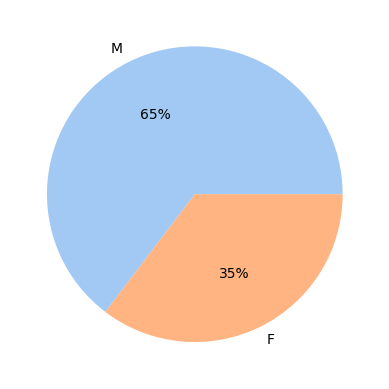

In [21]:
palette_color = sns.color_palette('pastel')

plt.pie(df.gender.value_counts(), colors=palette_color, labels=['M', 'F'], autopct='%.0f%%');

## Secondary Education

##### Percentage - 10th Grade

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


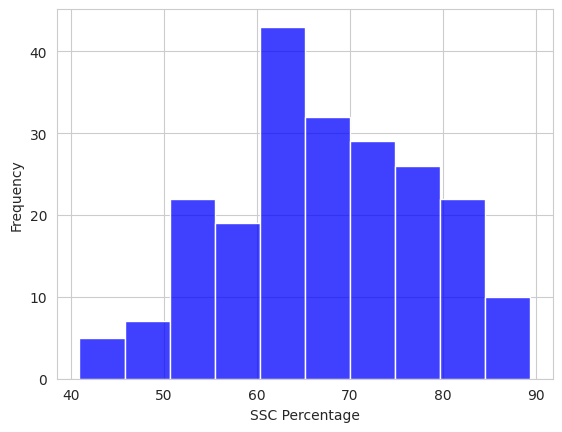

In [22]:
sns.set_style("whitegrid");

sns.histplot(
    data=df,
    x="ssc_p",
    color="blue",

);

plt.ylabel("Frequency");
plt.xlabel("SSC Percentage");

#### Board of Education

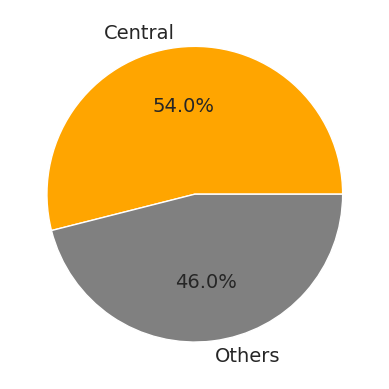

In [23]:
plt.pie(
    df.ssc_b.value_counts(),
    labels=dict_cat[2].values(),
    colors=['orange', 'gray'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
);

## Higher Secondary Education 

#### Percentage - 12th Grade

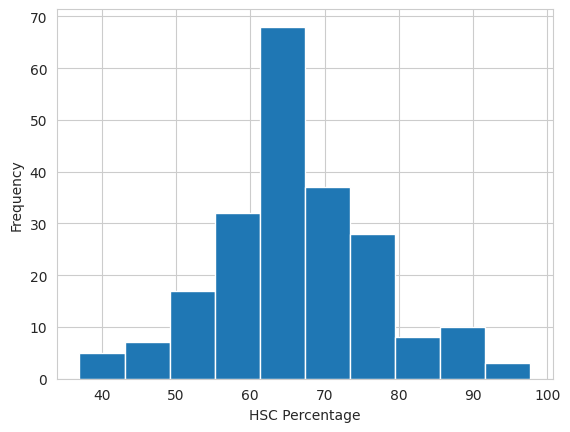

In [24]:
plt.hist(
    df.hsc_p,
    bins=10
)

sns.set_style("whitegrid");
sns.set_palette("Set2");

plt.ylabel("Frequency");
plt.xlabel("HSC Percentage");

#### Board of education

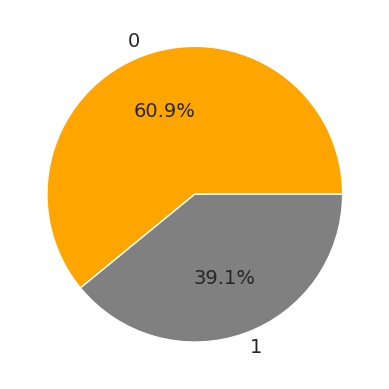

In [25]:
plt.pie(
    df.hsc_b.value_counts(),
    labels=dict_cat[2],
    colors=['orange', 'gray'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
);

# Machine Learning

In [26]:
y = df.status
y.head()

sl_no
1    1
2    1
3    1
4    0
5    1
Name: status, dtype: int8

In [27]:
X = df.iloc[:, 0:-2]
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
sl_no,,,,,,,,,,,,
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [29]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
prediction = model.predict(X_test)

In [31]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=dict_cat[-1], filled=True, rounded=True,  
...                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
print(classification_report(y_test, prediction))

In [ ]:
cm = confusion_matrix(y_test, prediction, labels=model.classes_)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.grid(False)
plt.show()